In [0]:
! rm -rf diploma
! git clone https://github.com/nine-k/diploma.git
! pip install deeppavlov
! pip install transformers 

Cloning into 'diploma'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 84 (delta 26), reused 73 (delta 20), pack-reused 0
Unpacking objects: 100% (84/84), done.
     |████████████████████████████████| 778kB 8.0MB/s 
     |████████████████████████████████| 10.4MB 308kB/s 
     |████████████████████████████████| 20.1MB 1.2MB/s 
     |████████████████████████████████| 8.0MB 22.5MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 
     |████████████████████████████████| 7.3MB 36.5MB/s 
     |████████████████████████████████| 665kB 48.9MB/s 
     |████████████████████████████████| 6.7MB 15.4MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 1.5MB 49.2MB/s 
     |████████████████████████████████| 2.1MB 45.4MB/s 
     |██████████

     |████████████████████████████████| 645kB 7.7MB/s 
     |████████████████████████████████| 1.1MB 21.8MB/s 
     |████████████████████████████████| 3.8MB 53.0MB/s 
     |████████████████████████████████| 890kB 49.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=e398c47dd655137555a18ffebfdc32a47333a0ab421a3cff9361ac6fa8dac44f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [0]:
import diploma.util.data_loader as data_loader
import diploma.util.parsing as parsing
import importlib
importlib.reload(parsing)
importlib.reload(data_loader)


from deeppavlov.core.common.file import read_json
from deeppavlov import build_model, configs

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [0]:
data_loader.download_dataset()
data_loader.download_test()
# data_loader.get_language_embeddings()

In [0]:
data = parsing.get_formatted_dataset()
test_data = parsing.get_formatted_dataset('./test', train=False)

bg
cs
pl
ru
bg
cs
pl
ru


In [0]:
from torch import nn
import torch
import gensim
import os
from tqdm import tqdm_notebook as tqdm
import numpy as np

In [0]:
def word2vec_pytorch(prefix='./', langs=["ru", "bg", "cs", "pl"]):
    res = {}
    print("loading embeddings")
    for lang in langs:
        print(lang)
        tmp = gensim.models.KeyedVectors.load_word2vec_format(os.path.join(prefix, '%s_w2v' % lang, 'model.txt'), binary=False, unicode_errors='replace')
        idx2word = tmp.index2word
        word2idx = {w: i for i, w in enumerate(idx2word)}
        embedding = nn.Embedding.from_pretrained(torch.FloatTensor(tmp.vectors))
        res[lang] = {
            'word2idx': word2idx,
            'idx2word': idx2word,
            'embeddings': embedding
        }
    return res

In [0]:
word_embs = word2vec_pytorch()

loading embeddings
ru


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


FileNotFoundError: ignored

In [0]:
def make_char2idx(data):
    res = set(' ')
    for docs in data.values():
        for doc in docs:
            for word, _ in doc:
                res |= set(word)
    idx2char = list(sorted(res))
    char2idx = {char: i for i, char in enumerate(idx2char)}
    return {
        "idx2char": idx2char,
        "char2idx": char2idx
    }
char_mappings = make_char2idx(data)

## Models

In [0]:
import torch
from torch import nn
from torch import optim

! pip3 install allennlp
# from allennlp.modules.elmo import Elmo, batch_to_ids
from allennlp.modules.conditional_random_field import ConditionalRandomField, allowed_transitions

import matplotlib.pyplot as plt
from IPython.display import clear_output


     |████████████████████████████████| 7.6MB 7.5MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 30.9MB 97kB/s 
     |████████████████████████████████| 256kB 50.9MB/s 
     |████████████████████████████████| 163kB 48.1MB/s 
     |████████████████████████████████| 204kB 57.0MB/s 
     |████████████████████████████████| 5.2MB 48.6MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 245kB 51.7MB/s 
     |████████████████████████████████| 133kB 54.0MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
     |████████████████████████████████| 2.1MB 49.0MB/s 
     |████████████████████████████████| 3.2MB 36.2MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.8.1-cp36-none-any.whl size=42712 sha256=ad3bdcfd2f9b42386a06ea1bcca763794300c66e4b377b5af0dde27cd84011a0
  Stored in directory: /root/.cache/pip/wheels/b7/8d/e7/a0e742

In [0]:
def get_tag_dict(data):
    tag_set = set()
    for _, docs in data.items():
        for doc in docs:
            for word in doc:
                tag_set.add(word[1].split('-')[0])
    idx2tag = list(sorted(tag_set))
    tag2idx = {tag: i for i, tag in enumerate(idx2tag)}
    idx2tag = {i: tag for i, tag in enumerate(idx2tag)}
    return idx2tag, tag2idx

In [0]:
idx2tag, tag2idx = get_tag_dict(data)

### CNN + BiLSTM + CRF

In [0]:
class CharLevelEmbedder(nn.Module):
    def __init__(self, char2idx, embeddings_dim, kernel_size, cnn_filters=128, gpu=True):
        super().__init__()
        self.embedding = nn.Embedding(len(char2idx) + 1, embeddings_dim, padding_idx=0)
        self.cnn_filters = cnn_filters
        self.cnn = nn.Conv1d(embeddings_dim, cnn_filters, kernel_size=5, padding=kernel_size // 2) 
        self.activation = nn.ReLU()
        self.char2idx = char2idx
        self.device = 'cuda' if gpu else 'cpu'
    
    def forward(self, x):
        max_words = len(max(x, key=lambda x: len(x[0]))[0])
        res = torch.zeros(len(x), max_words, self.cnn_filters, device=self.device)
        mask = torch.zeros(len(x), max_words, device=self.device, dtype=torch.bool)

        max_chars = -1
        for doc, _ in x:
            char_len = sum(map(
                lambda word: len(word) + 1,
                doc
            ))
            max_chars = max(char_len, max_chars)

        char_matrix = torch.zeros(len(x), max_chars, dtype=torch.long, device=self.device)
        char_mask = torch.zeros(len(x), max_chars, device=self.device)
        for doc_num, (doc, _) in enumerate(x):
            sent = ' '.join(doc)
            sent = torch.tensor(list(map(
                lambda char: self.char2idx.get(char, len(self.char2idx)),
                sent
            )), dtype=torch.long, device=self.device)
            char_matrix[doc_num, :sent.size(0)] = sent
            char_mask[doc_num, :sent.size(0)] = 1 

        char_emb = self.embedding(char_matrix)
        char_emb = (char_emb.T * char_mask.T).T.permute(0, 2, 1)
        char_emb = self.cnn(char_emb).permute(0, 2, 1)
        char_emb = self.activation(char_emb)

        for doc_num, (doc, _) in enumerate(x):
            start = 0
            for i, word in enumerate(doc):
                end = start + len(word)
                word_emb = char_emb[0, start:end, :]
                word_emb = torch.mean(word_emb, 0)
                res[doc_num, i] = word_emb
                start = end + 1 # joined with spaces
        return res

In [0]:
class MultilangEmbeddor(nn.Module):
    def __init__(self, word_embeddings, projection_space, gpu=True):
        super().__init__()
        self.word_embeddings = word_embeddings
        if gpu:
            for k in self.word_embeddings:
                self.word_embeddings[k]['embeddings'] = self.word_embeddings[k]['embeddings'].cuda()
        self.projections = nn.ModuleDict(
            {lang: nn.Linear(word_embeddings[lang]['embeddings'].embedding_dim, projection_space) for lang in self.word_embeddings.keys()}
        )
        self.out_of_dict = nn.Parameter(torch.randn(projection_space, requires_grad=True))
        self.projection_space = projection_space
        self.device = 'cuda' if gpu else 'cpu'

    def forward(self, x):
        max_words = len(max(x, key=lambda x: len(x[0]))[0])
        res = torch.zeros(len(x), max_words, self.projection_space, device=self.device)
        mask = torch.zeros(len(x), max_words, device=self.device, dtype=torch.bool)

        for doc_num, (doc, lang) in enumerate(x):
            idxes = np.array(list(map(
                        lambda word: self.word_embeddings[lang]['word2idx'].get(word.lower(), -1),
                        doc
                    )))
            out_of_vocab = np.where(idxes == -1)
            idxes[out_of_vocab] = 0
            embed = self.projections[lang](self.word_embeddings[lang]['embeddings'](torch.from_numpy(idxes).to(self.device)))
            embed[out_of_vocab, :] *= 0
            embed[out_of_vocab, :] += self.out_of_dict
            mask[doc_num, :len(doc)] = 1
            res[doc_num, :len(doc), :] = embed
        return res, mask

In [0]:
class CNN_BiLSTM_CRF(nn.Module):
    def __init__(self, num_tags, tag_dict, lstm_hidden, # general params
                 word_embeddings, projection_space, # world level params
                 char2idx, char_embeddings_dim=5, char_kernel_size=5, char_cnn_filters=24, # char level params
                 gpu=True):
        super().__init__()
        self.char_embedder = CharLevelEmbedder(char2idx, char_embeddings_dim, char_kernel_size, char_cnn_filters)
        self.word_embedder = MultilangEmbeddor(word_embeddings, projection_space)
        self.lstm = nn.LSTM(input_size=projection_space + char_cnn_filters,
                            hidden_size=lstm_hidden,
                            num_layers=1,
                            bidirectional=True, batch_first=True)
        
        self.linear = nn.Linear(2 * lstm_hidden, num_tags)
        self.crf = ConditionalRandomField(num_tags, allowed_transitions("BIO", tag_dict))
        if gpu:
            self.crf = self.crf.cuda()

        self.device = 'cuda' if gpu else 'cpu'

    def forward(self, x):
        # TODO add padding
        char_embs = self.char_embedder(x)
        word_embs, mask = self.word_embedder(x)
        embs = torch.cat((char_embs, word_embs), dim=-1)
        embs = self.lstm(embs)[0]
        embs = self.linear(embs)
        return embs, mask
    
    def get_loss(self, x, y, mask=None):
        logits, mask = self.forward(x)
        loss = self.crf(logis, y, mask)
        return -loss

    def get_prediction(self, x, mask=None):
        logits = self.forward(x)
        return list(map(lambda doc: self.crf.viterbi_tags(doc, mask), logits))

    def get_loss_and_pred(self, x, y):
        logits, mask = self.forward(x)
        max_y = len(max(y, key=len))
        gt = torch.zeros(len(y), max_y, device=self.device, dtype=torch.long)
        for i, doc in enumerate(y):
            gt[i, :len(doc)] = torch.tensor(doc, dtype=torch.long, device=self.device)
        loss = self.crf(logits, gt, mask)
        preds = self.crf.viterbi_tags(logits, mask)
        return -loss, preds

### Use BERT embs

In [0]:
class BertEmbeddor(nn.Module):
    def __init__(self, bert, emb_size, gpu=True):
        super().__init__()
        self.bert = bert
        self.emb_size = emb_size
        self.device = 'cuda' if gpu else 'cpu'

    def forward(self, x):
        max_words = len(max(x, key=lambda x: len(x[0]))[0])
        res = torch.zeros(len(x), max_words, self.emb_size, device=self.device)
        mask = torch.zeros(len(x), max_words, device=self.device, dtype=torch.bool)
        docs, _ = zip(*x)
        tokens, embs = self.bert(list(map(lambda doc: ' '.join(doc), docs)))[:2]
        for doc_num, (doc, lang) in enumerate(x):
            res_emb = None
            # TODO make tokenizer custom in data loader
            if len(embs[doc_num]) == len(doc):
                emb = embs[doc_num]
            elif len(embs[doc_num]) > len(doc): # assuming berts tokenizer splits punctuation sequences
                emb = np.empty([len(doc), self.emb_size])
                doc_pos = 0
                bert_pos = 0
                skipped_prev = False
                while doc_pos < len(doc):
                    doc_token = doc[doc_pos].lower()
                    if bert_pos >= len(tokens[doc_num]):
                        print(doc)
                        print(tokens[doc_num])
                    bert_token = tokens[doc_num][bert_pos].lower()
                    if doc_token == bert_token or doc_token.endswith(bert_token):
                        if skipped_prev:
                            emb[doc_pos] = (embs[doc_num][bert_pos] + embs[doc_num][bert_pos - 1]) / 2
                        else:
                            emb[doc_pos] = embs[doc_num][bert_pos]
                        skipped_prev = False
                        doc_pos += 1
                        bert_pos += 1
                    else:
                        skipped_prev = True
                        bert_pos += 1
            else:
                print(len(doc))
                print(len(tokens[doc_num]), len(embs[doc_num]))
                print(doc)
                print(tokens[doc_num])
                raise ValueError
            mask[doc_num, :len(doc)] = 1
            res[doc_num, :len(doc), :] = torch.from_numpy(emb).to(self.device)
        return res, mask

In [0]:
class CNN_BERT_CRF(nn.Module):
    def __init__(self, num_tags, tag_dict, lstm_hidden, # general params
                 BERT, emb_size,# world level params
                 char2idx, char_embeddings_dim=5, char_kernel_size=5, char_cnn_filters=24, # char level params
                 gpu=True):
        super().__init__()
        self.char_embedder = CharLevelEmbedder(char2idx, char_embeddings_dim, char_kernel_size, char_cnn_filters)
        self.word_embedder = BertEmbeddor(BERT, emb_size)
        self.lstm = nn.LSTM(input_size=emb_size + char_cnn_filters,
                            hidden_size=lstm_hidden,
                            num_layers=1,
                            bidirectional=True, batch_first=True)
        
        self.linear = nn.Linear(2 * lstm_hidden, num_tags)
        self.crf = ConditionalRandomField(num_tags, allowed_transitions("BIO", tag_dict))
        if gpu:
            self.crf = self.crf.cuda()

        self.device = 'cuda' if gpu else 'cpu'

    def forward(self, x):
        # TODO add padding
        char_embs = self.char_embedder(x)
        word_embs, mask = self.word_embedder(x)
        embs = torch.cat((char_embs, word_embs), dim=-1)
        embs = self.lstm(embs)[0]
        embs = self.linear(embs)
        return embs, mask
    
    def get_loss(self, x, y, mask=None):
        logits, mask = self.forward(x)
        loss = self.crf(logis, y, mask)
        return -loss

    def get_prediction(self, x, mask=None):
        logits = self.forward(x)
        return list(map(lambda doc: self.crf.viterbi_tags(doc, mask), logits))

    def get_loss_and_pred(self, x, y):
        logits, mask = self.forward(x)
        max_y = len(max(y, key=len))
        gt = torch.zeros(len(y), max_y, device=self.device, dtype=torch.long)
        for i, doc in enumerate(y):
            gt[i, :len(doc)] = torch.tensor(doc, dtype=torch.long, device=self.device)
        loss = self.crf(logits, gt, mask)
        preds = self.crf.viterbi_tags(logits, mask)
        return -loss, preds

### Char LM embs

#### Char LM

In [0]:
class CharLM(nn.Module):
    _ALLOWED_LANGUAGE_MODES = ['concat', 'add', 'learn_h0', None]
    def __init__(self, char2idx, embedding_size, lstm_hidden, language_mode=None, language_list=None, lang_embedding_size=None, gpu=True):
        super().__init__()
        lstm_input_size = embedding_size
        # language processing
        if language_mode is None:
            self.language_mode = None
        elif language_mode == 'concat':
            self.language_mode = 'concat'
            if lang_embedding_size is None:
                raise ValueError('concat mode selected, but language emedding size not provided')
            self.lang_embedding_size = lang_embedding_size
            lstm_input_size += lang_embedding_size
        elif language_mode == 'add':
            self.language_mode = 'add'
            self.lang_embedding_size = embedding_size
        else:
            raise ValueError('language mode must be in %s, but %s provided' % (CharLM._ALLOWED_LANGUAGE_MODES, language_mode))

        if self.language_mode:
            self.language_embs = nn.ParameterDict(
                {lang: nn.Parameter(torch.randn(self.lang_embedding_size, requires_grad=True)) for lang in language_list}
            )

        # char embedding
        self.char_embeddings = nn.Embedding(len(char2idx), embedding_size, padding_idx=0)
        # lstm
        self.lstm_hidden = lstm_hidden
        self.lstm = nn.LSTM(lstm_input_size, lstm_hidden, batch_first=True, bidirectional=True)
        # linear layer
        self.linear_forward = nn.Linear(lstm_hidden, len(char2idx))
        self.linear_backward = nn.Linear(lstm_hidden, len(char2idx))
        # loss
        self.loss = nn.CrossEntropyLoss(ignore_index=0)

        self.char2idx = char2idx
        self.device = 'cuda' if gpu else 'cpu'

    def forward(self, x):
        # TODO add initial state for learn h0
        if self.language_mode == 'learn_h0':
            raise NotImplementedError("learning initial hidden state is not implemented yet")
        else:
            h0, c0 = None, None
        x, _ = self.lstm(x)
        bsz = x.batch_sizes[0]
        x = nn.utils.rnn.pad_packed_sequence(x, batch_first=True, padding_value=0.0)[0]
        bsz, max_len, _ = x.size()
        x = x.view(bsz, max_len, 2, self.lstm_hidden)
        return x[:, :, 0], x[:, :, 1] # forward, backward

    def calc_loss(self, sentences, langs):
        embeded, indexed_sents = self.embed_and_pack(sentences, langs)
        lstm_forward, lstm_backward = self(embeded)
        # TODO make sure this the correct order
        # print(lstm_forward.size(), lstm_backward.size())
        preds_f = self.linear_forward(lstm_forward)
        preds_b = self.linear_backward(lstm_backward)
        # print(preds_f.size(), preds_b.size(), indexed_sents.size())
        loss_f = self.loss(preds_f[:, :-1].reshape(-1, len(self.char2idx)), indexed_sents[:, 1:].reshape(-1))
        # set end token to 0, which is ignored by the loss function
        backward_mask = (indexed_sents != self.char2idx['<END>'])[:, :-1]
        loss_b = self.loss(preds_b[:, 1:].reshape(-1, len(self.char2idx)), (indexed_sents[:, :-1] * backward_mask).reshape(-1))
        return loss_f, loss_b
        
    @staticmethod
    def build_char_dict(corpus, special_tokens=['<PAD>', '<START>', '<END>']):
        chars = set()
        for doc in corpus:
            for char in doc:
                chars.add(char)
        char_list = special_tokens + list(sorted(chars))
        char2idx = {char: idx for idx, char in enumerate(char_list)}
        idx2char = {idx: char for idx, char in enumerate(char_list)}
        return char2idx, idx2char

    def get_lang_embdding_matrix(self, langs, max_len):
        bsz = len(langs)
        res = torch.empty(bsz, max_len, self.lang_embedding_size, device=self.device)
        for idx, lang in enumerate(langs):
            res[idx] = self.language_embs[lang].unsqueeze(0).repeat((max_len, 1))
        return res

    def embed_words(self, tokenized_sentences, langs):
        joined_sentences = list(map(
            lambda sentence: ' '.join(sentence),
            tokenized_sentences
        ))
        embeded, indexed_sents = self.embed_and_pack(joined_sentences, langs)
        forward, backward = self(embeded)
        max_sent_len = len(max(tokenized_sentences, key=len))
        res = torch.zeros(len(tokenized_sentences), max_sent_len, self.lstm_hidden * 2, device=self.device)
        mask = torch.zeros(len(tokenized_sentences), max_sent_len, device=self.device, dtype=torch.bool)
        #res = [None] * len(tokenized_sentences)
        for idx, sent in enumerate(tokenized_sentences):
            cur_pos = 1
            for widx, word in enumerate(sent):
                femb = forward[idx, cur_pos + len(word) - 1]
                bemb = backward[idx, cur_pos]
                cur_pos += len(word) + 1
                res[idx, widx, :self.lstm_hidden] = femb
                res[idx, widx, self.lstm_hidden:] = bemb
            mask[idx, :len(sent)] = 1
        return res, mask

    def embed_and_pack(self, sentences, langs): # build tensor of shape bsz * max_len
        # declare variables
        batch_lens = [None] * len(sentences)
        max_len = len(max(sentences, key=len)) + 2 # start and end token
        res = torch.zeros(len(sentences), max_len, dtype=torch.long).to(self.device)
        if self.language_mode in ('concat', 'add'):
            lang_emb = self.get_lang_embdding_matrix(langs, max_len)

        # process documents
        for i, sent in enumerate(sentences):
            idxed_sent = [self.char2idx['<START>']] + list(map(lambda char: self.char2idx.get(char), sent)) + [self.char2idx['<END>']]
            res[i, :len(idxed_sent)] = torch.tensor(idxed_sent, device=self.device, dtype=torch.long)
            batch_lens[i] = len(idxed_sent)
        batch_lens = torch.tensor(batch_lens, device=self.device, dtype=torch.long)
        idxed_sent = res
        res = self.char_embeddings(res)

        # add language information if needed
        if self.language_mode == 'concat':
            res = torch.cat((res, lang_emb), dim=-1)
        elif self.language_mode == 'add':
            res += lang_emb

        # pack sequence
        res = nn.utils.rnn.pack_padded_sequence(res, batch_lens, batch_first=True, enforce_sorted=False)
        return res, idxed_sent



#### CharLM only model

In [0]:
class CHARLM_BiLSTM_CRF(nn.Module):
    def __init__(self, num_tags, tag_dict, lstm_hidden, # general params
                 char_embedder, emb_size,# world level params
                 char_lm, # char level params
                 gpu=True):
        super().__init__()
        self.char_embedder = char_embedder
        self.lstm = nn.LSTM(input_size=emb_size,
                            hidden_size=lstm_hidden,
                            num_layers=1,
                            bidirectional=True, batch_first=True)
        
        self.linear = nn.Linear(2 * lstm_hidden, num_tags)
        self.crf = ConditionalRandomField(num_tags, allowed_transitions("BIO", tag_dict))
        if gpu:
            self.crf = self.crf.cuda()

        self.device = 'cuda' if gpu else 'cpu'

    def forward(self, x):
        x, langs = zip(*x)
        embs, mask = self.char_embedder.embed_words(x, langs)
        embs = self.lstm(embs)[0]
        embs = self.linear(embs)
        return embs, mask
    
    def get_loss(self, x, y, mask=None):
        logits, mask = self.forward(x)
        loss = self.crf(logis, y, mask)
        return -loss

    def get_prediction(self, x, mask=None):
        logits = self.forward(x)
        return list(map(lambda doc: self.crf.viterbi_tags(doc, mask), logits))

    def get_loss_and_pred(self, x, y):
        logits, mask = self.forward(x)
        max_y = len(max(y, key=len))
        gt = torch.zeros(len(y), max_y, device=self.device, dtype=torch.long)
        for i, doc in enumerate(y):
            gt[i, :len(doc)] = torch.tensor(doc, dtype=torch.long, device=self.device)
        loss = self.crf(logits, gt, mask)
        preds = self.crf.viterbi_tags(logits, mask)
        return -loss, preds

#### CharLM + BERT

In [0]:
class CHARLM_BERT_BiLSTM_CRF(nn.Module):
    def __init__(self, num_tags, tag_dict, lstm_hidden, # general params
                 char_embedder, emb_size,# char level params
                 BERT, bert_emb_size, # word level params
                 gpu=True):
        super().__init__()
        self.char_embedder = char_embedder
        self.word_embedder = BertEmbeddor(BERT, bert_emb_size)
        self.lstm = nn.LSTM(input_size=emb_size + bert_emb_size,
                            hidden_size=lstm_hidden,
                            num_layers=1,
                            bidirectional=True, batch_first=True)
        
        self.linear = nn.Linear(2 * lstm_hidden, num_tags)
        self.crf = ConditionalRandomField(num_tags, allowed_transitions("BIO", tag_dict))
        if gpu:
            self.crf = self.crf.cuda()

        self.device = 'cuda' if gpu else 'cpu'

    def forward(self, x):
        sents, langs = zip(*x)
        embs, mask = self.char_embedder.embed_words(sents, langs)
        word_embs, _ = self.word_embedder(x)
        embs = self.lstm(torch.cat((embs, word_embs), dim=-1))[0]
        embs = self.linear(embs)
        return embs, mask
    
    def get_loss(self, x, y, mask=None):
        logits, mask = self.forward(x)
        loss = self.crf(logis, y, mask)
        return -loss

    def get_prediction(self, x, mask=None):
        logits = self.forward(x)
        return list(map(lambda doc: self.crf.viterbi_tags(doc, mask), logits))

    def get_loss_and_pred(self, x, y):
        logits, mask = self.forward(x)
        max_y = len(max(y, key=len))
        gt = torch.zeros(len(y), max_y, device=self.device, dtype=torch.long)
        for i, doc in enumerate(y):
            gt[i, :len(doc)] = torch.tensor(doc, dtype=torch.long, device=self.device)
        loss = self.crf(logits, gt, mask)
        preds = self.crf.viterbi_tags(logits, mask)
        return -loss, preds

### Train utils

In [0]:
def plot_history(train_history, eval_history=None):
    
    if len(train_history) == 0:
        return
    metrics = train_history[0].keys()
    n = len(metrics)
    fig, ax = plt.subplots((n + 1) // 2, 2, figsize=(15, 10))
    
    for i, metric in enumerate(metrics):
        train_arr = list(map(lambda x: x[metric], train_history))
        eval_arr = list(map(lambda x: x[metric], eval_history))
        
        step = len(train_arr) // len(eval_arr)
        start = step - 1
        end = len(train_arr)
        
        
        ax[i // 2, i % 2].plot(list(range(len(train_arr))), train_arr, label='train')
        ax[i // 2, i % 2].scatter(list(range(start, end, step)),
                                  eval_arr, c='r', zorder=3, label='eval')
        ax[i // 2, i % 2].set_title(metric)
        ax[i // 2, i % 2].set_xlabel('train steps')
        ax[i // 2, i % 2].set_ylabel(metric)
        ax[i // 2, i % 2].legend()
    plt.show()

In [0]:
from collections import defaultdict

def calc_metrics(pred, y, tag_dict):
    TP_dict = defaultdict(int)
    TPFP_dict = defaultdict(int)
    TPFN_dict = defaultdict(int)
    res_dict = defaultdict(int)
    non_zero = 0
    for k in tag_dict:
        for i, row in enumerate(pred):
            for j, tag in enumerate(row[0]):
                TP_dict[k] += (y[i][j] == tag) and (y[i][j] == k)
                TPFP_dict[k] += (tag == k)
                TPFN_dict[k] += (k == y[i][j])
        if TPFP_dict[k] > 0 and TPFN_dict[k] > 0 and TP_dict[k] > 0:
            non_zero += 1
            prec = TP_dict[k] / TPFP_dict[k]
            rec = TP_dict[k] / TPFN_dict[k]
            f1 = 2 * (prec * rec) / (prec + rec)
            res_dict['precision macro'] += prec
            res_dict['recall macro'] += rec
            res_dict['f1 macro'] += f1
    for k in res_dict:
        res_dict[k] /= non_zero
    correct = 0
    total = 0
    for i, row in enumerate(pred):
        for j, tag in enumerate(row[0]):
            correct += tag == y[i][j]
            total += 1
    res_dict['precision'] = correct / total
    # for k in idx_to_tag:
    #    res_dict['recall on %s' % idx_to_tag[k]] = correct_dict[k] / total_dict[k] if total_dict[k] > 0 else 0
    return res_dict

In [0]:
def batch_iterate(data, batch_size=32, shuffle=True, tag_map=None, pad=False, split_by=['.', '?', '!']):
    langs = data.keys()
    x = []
    y = []
    for lang in langs:
        for doc in data[lang]:
            tmp_x = []
            tmp_y = []
            for word, tag in doc:
                tmp_x.append(word)
                tmp_y.append(tag_map[tag] if tag_map else tag)
                if word in split_by:
                    x.append((tmp_x, lang))
                    y.append(tmp_y)
                    tmp_x = []
                    tmp_y = []
            if tmp_x:
                x.append((tmp_x, lang))
                y.append(tmp_y)
    # x = [(doc, lang), ]
    # y = [tags, ]
    x = np.array(x)
    y = np.array(y)
    n = x.shape[0]

    if pad:
        raise NotImplementedError('padding is not implemented yet')

    if shuffle:
        shuffle_idxs = np.arange(n)
        np.random.shuffle(shuffle_idxs)
        x = x[shuffle_idxs]
        y = y[shuffle_idxs]
    for batch_start in range(0, n, batch_size):
        batch_end = min(n, batch_start + batch_size)
        yield x[batch_start:batch_end], y[batch_start:batch_end]

In [0]:
def train_epoch(model, optimizer, train_iterator, history, idx2tag):
    for x, y in tqdm(train_iterator):
        model.train()
        model.zero_grad()
        loss, pred = model.get_loss_and_pred(x, y)
        loss.backward()
        optimizer.step()
        metrics = calc_metrics(pred, y, idx2tag)
        metrics['loss'] = loss.item()
        history['train'].append(metrics)

def eval_epoch(model, test_iterator, history, idx2tag):
    history_local = []
    with torch.no_grad():
        for x, y in tqdm(test_iterator):
            loss, pred = model.get_loss_and_pred(x, y)
            metrics = calc_metrics(pred, y, idx2tag)
            metrics['loss'] = loss.item()
            history_local.append(metrics)
        metrics = dict()
        for k in history_local[0].keys():
            vals = list(map(lambda x: x[k], history_local))
            metrics[k] = np.mean(vals)
        history['test'].append(metrics)

def train_model(model, optimizer, train_data, test_data, batch_size, epochs, tag2idx, idx2tag):
    history = {
        'train': [],
        'test': []
    }
    for e in range(epochs):
        print("starting epoch %d" % e)
        train_epoch(model, optimizer, batch_iterate(train_data, batch_size, tag_map=tag2idx), history, idx2tag)
        if test_data:
            eval_epoch(model, batch_iterate(test_data, 128, tag_map=tag2idx), history, idx2tag)
            plot_history(history['train'], history['test'])
            print(history['test'][-1])
    return history

### Train

#### Word2vec

In [0]:
model = CNN_BiLSTM_CRF(len(idx2tag), idx2tag, 128,
                       word_embs, 128,
                       char_mappings['char2idx']).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

starting epoch 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


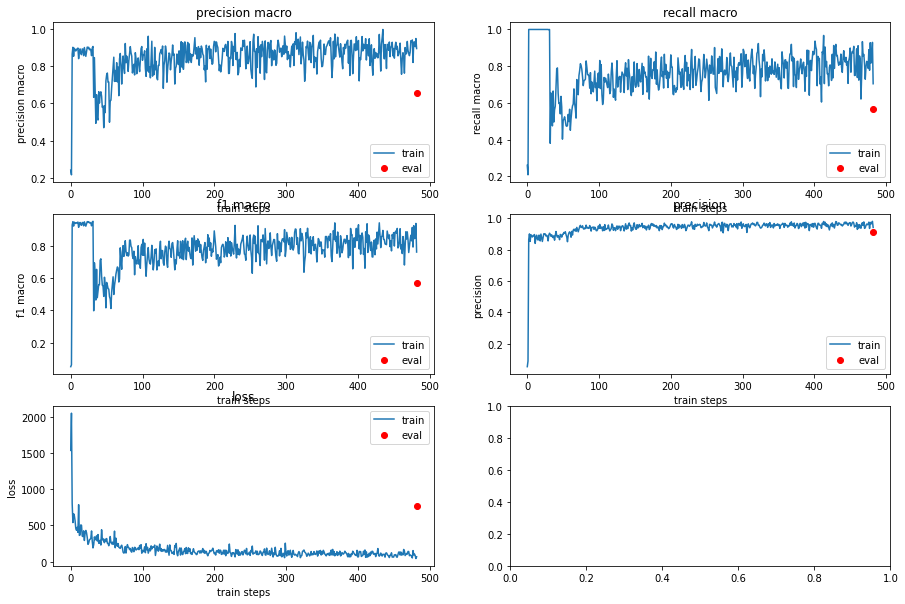

defaultdict(<class 'int'>, {'precision macro': 0.8935444185444186, 'recall macro': 0.704098865877712, 'f1 macro': 0.7599728887464736, 'precision': 0.9414758269720102, 'loss': 65.32402801513672})
starting epoch 1


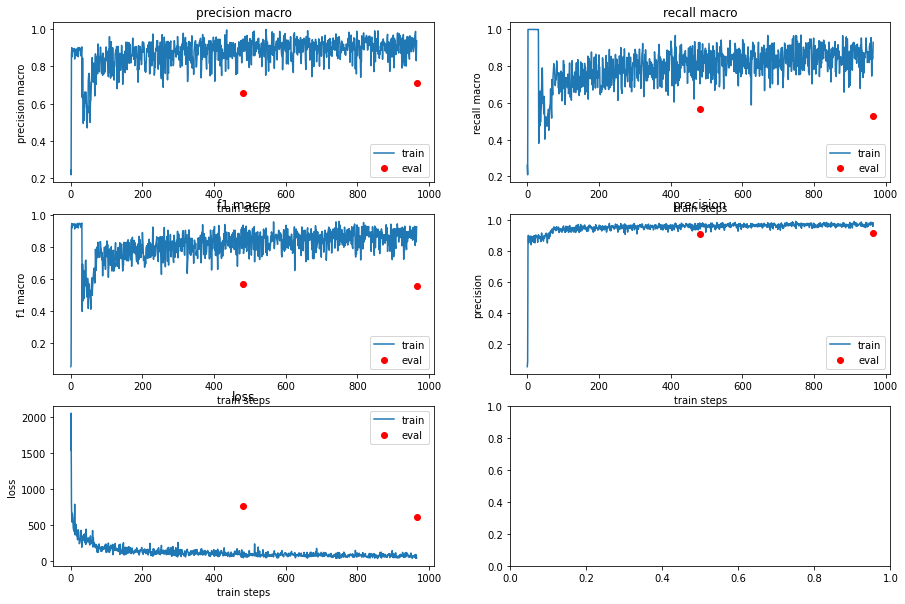

defaultdict(<class 'int'>, {'precision macro': 0.9371494391025642, 'recall macro': 0.9296851432880845, 'f1 macro': 0.92708020552427, 'precision': 0.9799196787148594, 'loss': 39.34699249267578})


In [0]:
train_model(model, optimizer, data, test_data, 32, 2, tag2idx, idx2tag)

#### Train with bert

In [0]:
! wget http://files.deeppavlov.ai/deeppavlov_data/bert/bg_cs_pl_ru_cased_L-12_H-768_A-12_pt.tar.gz
! mkdir bert
! tar -C bert -zxvf bg_cs_pl_ru_cased_L-12_H-768_A-12_pt.tar.gz

--2020-05-20 06:08:01--  http://files.deeppavlov.ai/deeppavlov_data/bert/bg_cs_pl_ru_cased_L-12_H-768_A-12_pt.tar.gz
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... 93.175.29.74
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|93.175.29.74|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662278002 (632M) [application/octet-stream]
Saving to: ‘bg_cs_pl_ru_cased_L-12_H-768_A-12_pt.tar.gz’

bg_cs_pl_ru_cased_L 100%[===================>] 631.60M  7.42MB/s    in 85s     

2020-05-20 06:09:26 (7.39 MB/s) - ‘bg_cs_pl_ru_cased_L-12_H-768_A-12_pt.tar.gz’ saved [662278002/662278002]

bg_cs_pl_ru_cased_L-12_H-768_A-12_pt/
bg_cs_pl_ru_cased_L-12_H-768_A-12_pt/pytorch_model.bin
bg_cs_pl_ru_cased_L-12_H-768_A-12_pt/bert_config.json
bg_cs_pl_ru_cased_L-12_H-768_A-12_pt/vocab.txt


In [0]:
bert_config = read_json(configs.embedder.bert_embedder)
bert_config['metadata']['variables']['BERT_PATH'] = './bert/bg_cs_pl_ru_cased_L-12_H-768_A-12_pt'
m = build_model(bert_config)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


training on bg
starting epoch 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


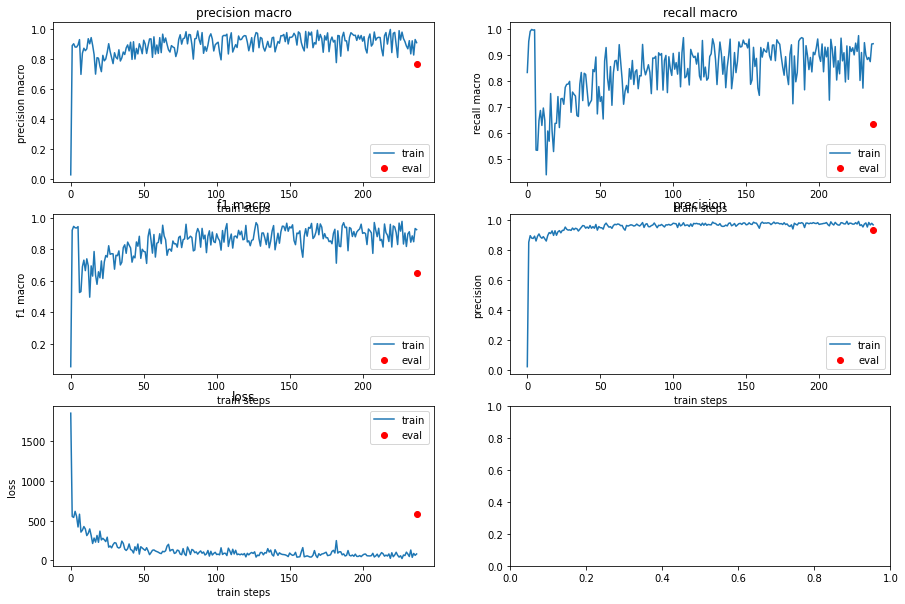

{'precision macro': 0.7691588256047779, 'recall macro': 0.6326807176482866, 'f1 macro': 0.6465758869293109, 'precision': 0.9348142166106524, 'loss': 589.350292005037}
starting epoch 1


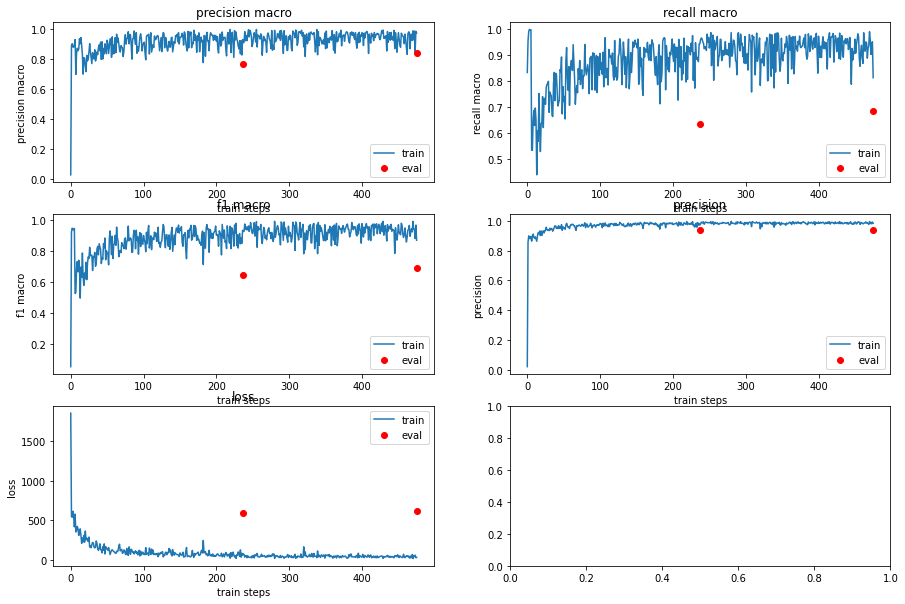

{'precision macro': 0.8393469011307986, 'recall macro': 0.6833399002341984, 'f1 macro': 0.6871881275567371, 'precision': 0.9349165194941877, 'loss': 623.8255824038857}
training on cs
starting epoch 0


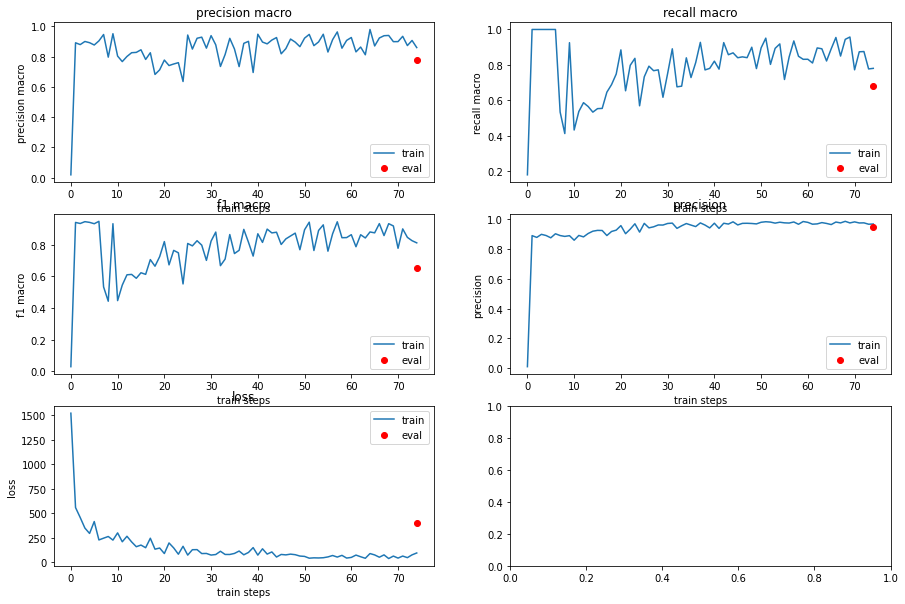

{'precision macro': 0.7777118743035786, 'recall macro': 0.6803310178259473, 'f1 macro': 0.6505965940634818, 'precision': 0.9469458260992532, 'loss': 401.3625935145787}
starting epoch 1


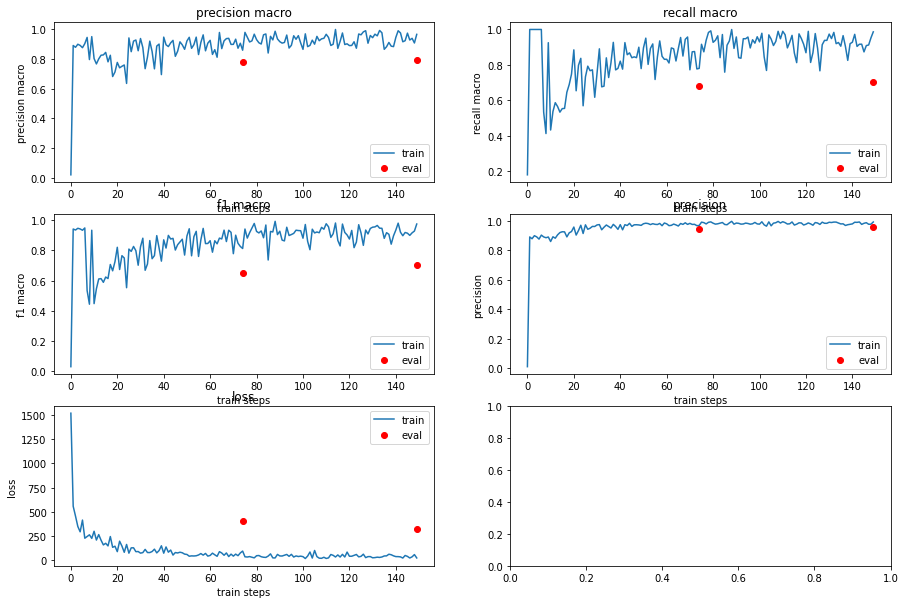

{'precision macro': 0.7916517117059303, 'recall macro': 0.7035359637054854, 'f1 macro': 0.702270749072626, 'precision': 0.9558511757314925, 'loss': 319.2267712184361}
training on pl
starting epoch 0


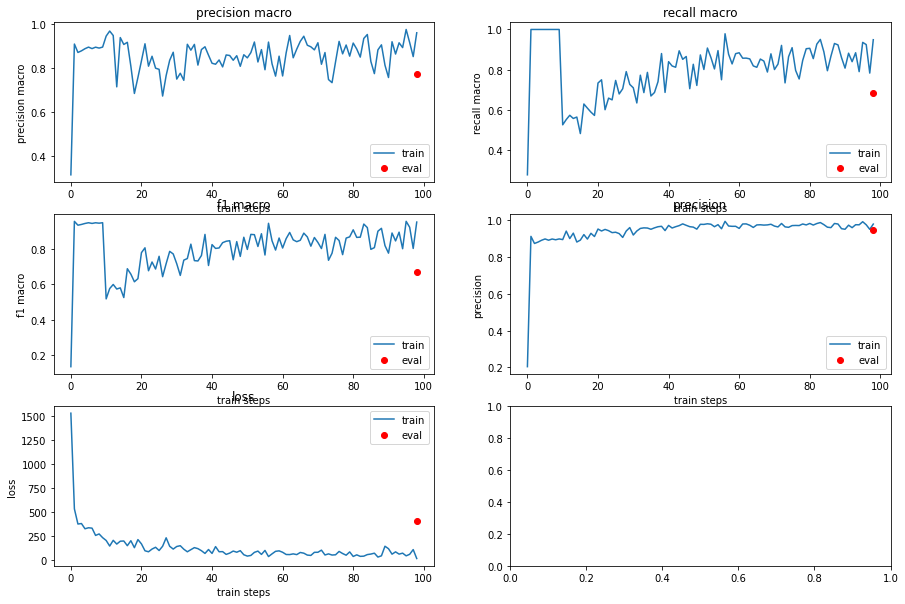

{'precision macro': 0.7716877539744289, 'recall macro': 0.6827137711111292, 'f1 macro': 0.6692019437259644, 'precision': 0.9423976286366212, 'loss': 410.36586671717026}
starting epoch 1


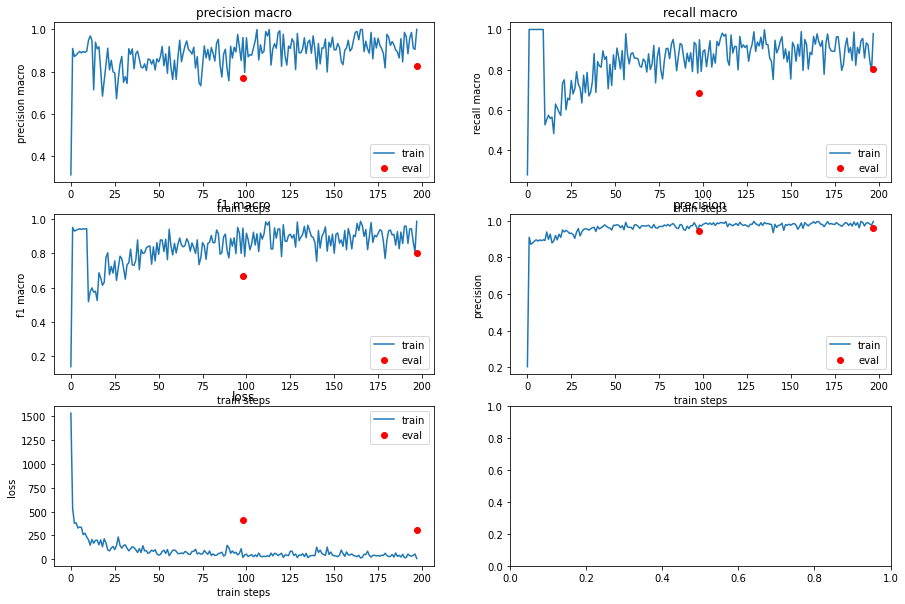

{'precision macro': 0.8253671451435395, 'recall macro': 0.8048581757001398, 'f1 macro': 0.8035005461544025, 'precision': 0.9616611922089435, 'loss': 304.4466262144201}
training on ru
starting epoch 0


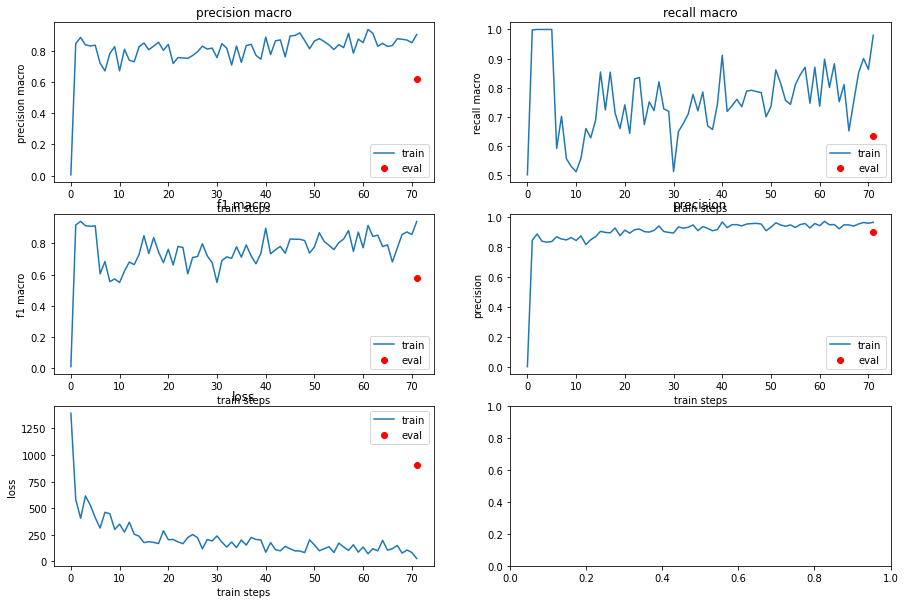

{'precision macro': 0.6212697846494168, 'recall macro': 0.6329661611437495, 'f1 macro': 0.5794466695271093, 'precision': 0.9030717092635804, 'loss': 906.7089157104492}
starting epoch 1


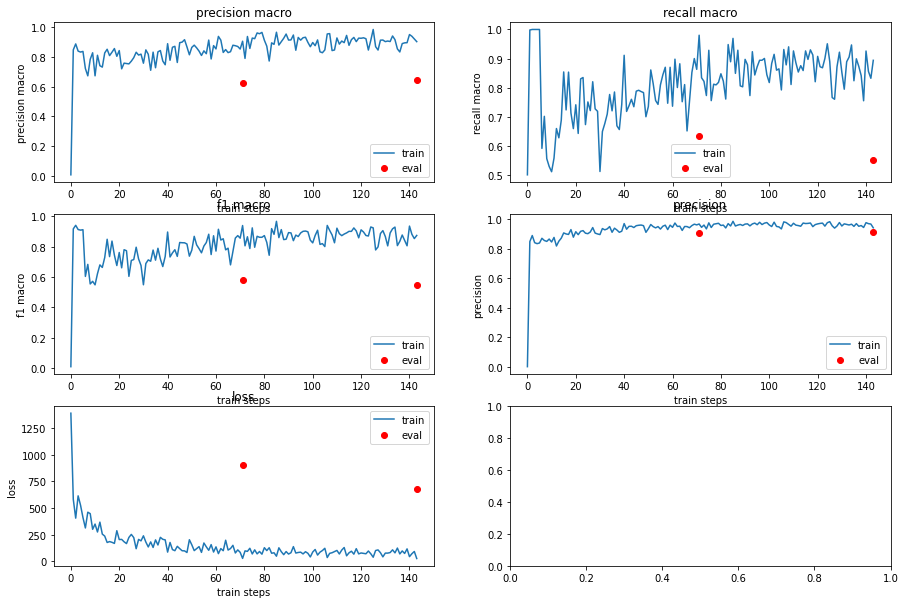

{'precision macro': 0.6464945423657189, 'recall macro': 0.54965096731943, 'f1 macro': 0.5460616648346344, 'precision': 0.914250426764422, 'loss': 678.3978144327799}


In [0]:
results = {}
for lang in data.keys():
    print('training on %s' % lang)
    model = CNN_BERT_CRF(len(idx2tag), idx2tag, 128,
                       m, 768,
                       char_mappings['char2idx']).cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    small_train = {lang: data[lang]}
    small_test = {lang: test_data[lang]}
    results[lang] = train_model(model, optimizer, small_train, small_test, 32, 2, tag2idx, idx2tag)


In [0]:
for lang, metrics in results.items():
    print("BEST f1 macro for %s: %f" % (lang, max(metrics, key=lambda x: x['f1 macro'])['f1 macro']))

BEST f1 macro for bg: 0.687188
BEST f1 macro for cs: 0.702271
BEST f1 macro for pl: 0.803501
BEST f1 macro for ru: 0.579447


In [0]:
for lang in test_data.keys():
    history = defaultdict(list)
    eval_epoch(model, batch_iterate({lang: test_data[lang]}, 128, tag_map=tag2idx), history, idx2tag)
    results_all[lang] = history['test']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


In [0]:
model = CNN_BERT_CRF(len(idx2tag), idx2tag, 128,
                       m, 768,
                       char_mappings['char2idx']).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
train_model(model, optimizer, data, None, 32, 2, tag2idx, idx2tag)
results_all = {}
for lang in test_data.keys():
    history = defaultdict(list)
    eval_epoch(model, batch_iterate({lang: test_data[lang]}, 128, tag_map=tag2idx), history, idx2tag)
    results_all[lang] = history['test']

In [0]:
for lang, metric in results_all.items():
    print("BEST f1 macro for %s: %f" % (lang, metric[0]['f1 macro']))

BEST f1 macro for bg: 0.680762
BEST f1 macro for cs: 0.830774
BEST f1 macro for pl: 0.830749
BEST f1 macro for ru: 0.657799


In [0]:
model = CNN_BERT_CRF(len(idx2tag), idx2tag, 128,
                       m, 768,
                       char_mappings['char2idx']).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

starting epoch 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


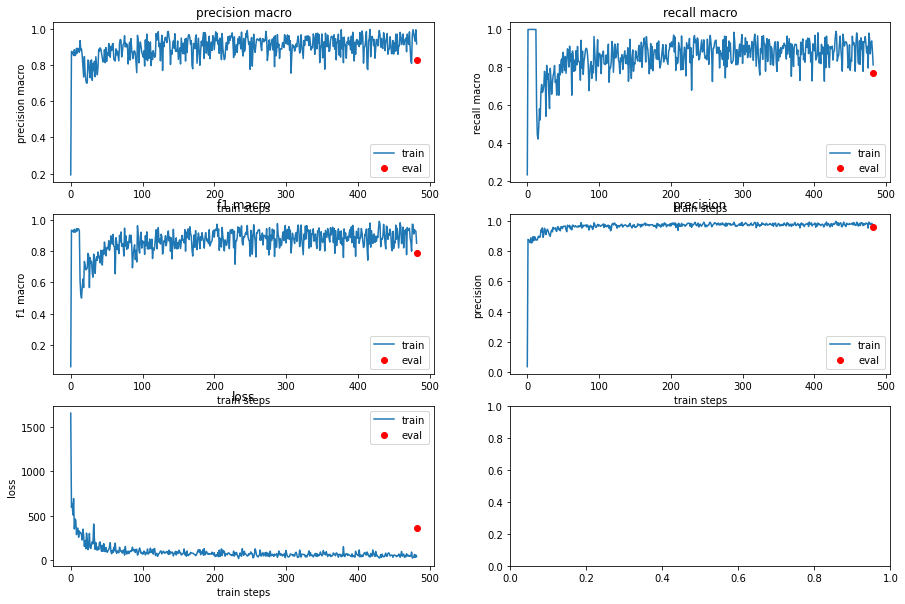

{'precision macro': 0.8270959845102931, 'recall macro': 0.7721881525069373, 'f1 macro': 0.7854676647878583, 'precision': 0.955202756033075, 'loss': 367.0476044874925}
starting epoch 1


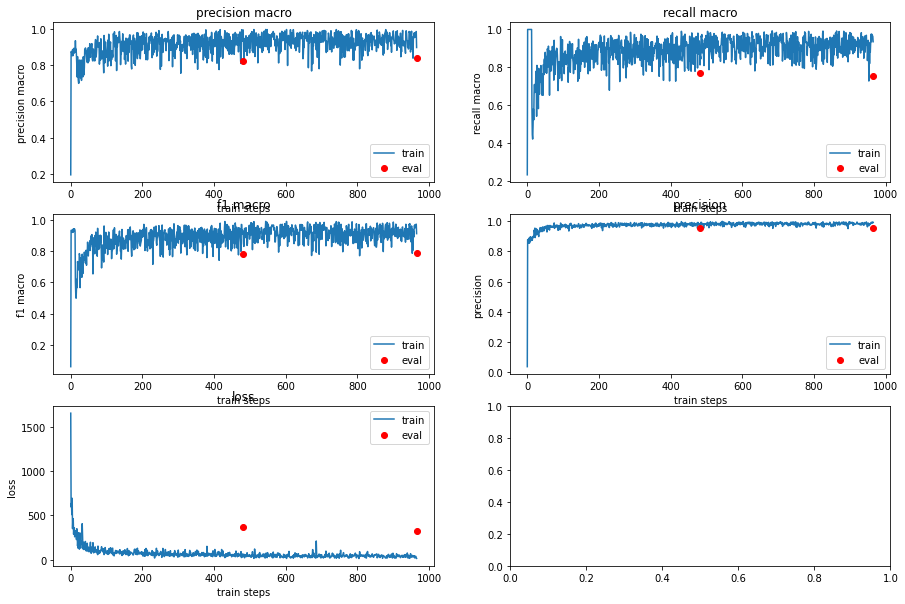

{'precision macro': 0.8403433576853966, 'recall macro': 0.757224428810362, 'f1 macro': 0.7865414587416789, 'precision': 0.9557107463340978, 'loss': 328.07596456087555}


{'test': [{'f1 macro': 0.7854676647878583,
   'loss': 367.0476044874925,
   'precision': 0.955202756033075,
   'precision macro': 0.8270959845102931,
   'recall macro': 0.7721881525069373},
  {'f1 macro': 0.7865414587416789,
   'loss': 328.07596456087555,
   'precision': 0.9557107463340978,
   'precision macro': 0.8403433576853966,
   'recall macro': 0.757224428810362}],
 'train': [defaultdict(int,
              {'f1 macro': 0.059375943083108194,
               'loss': 1653.66357421875,
               'precision': 0.037396121883656507,
               'precision macro': 0.19285101695595347,
               'recall macro': 0.23389938637861962}),
  defaultdict(int,
              {'f1 macro': 0.9345238095238095,
               'loss': 594.510498046875,
               'precision': 0.8770949720670391,
               'precision macro': 0.8770949720670391,
               'recall macro': 1.0}),
  defaultdict(int,
              {'f1 macro': 0.9330965068087627,
               'loss': 638.032470703

In [0]:
train_model(model, optimizer, data, test_data, 32, 2, tag2idx, idx2tag)

#### Char LM embeddings

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Corpus/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pickle
with open("./gdrive/My Drive/CHARM_LMS/char2idx_small_lr", 'rb') as f:
    lm_char2idx = pickle.load(f)

In [0]:
len(lm_char2idx)

2511

In [0]:
LANGS = ['bg', 'pl', 'cs', 'ru']
models = [
    {
        'name': "Concat lang",
        'path': "./gdrive/My Drive/CHARM_LMS/512_2048_concat_128",
        'params': {
            'language_mode': 'concat',
            'lang_embedding_size': 128,
            'language_list': LANGS,
        }
    },
    {
        'name': 'No lang',
        'path': "./gdrive/My Drive/CHARM_LMS/512_2048_none",
        'params': {
            'language_mode': None,
            'lang_embedding_size': None,
            'language_list': LANGS,
        }
    },
    {
        'name': 'Add lang',
        'path': "./gdrive/My Drive/CHARM_LMS/add_512_2048_1500it",
        'params': {
            'language_mode': 'add',
            'lang_embedding_size': None,
            'language_list': LANGS,
        }
    }
]
models = [
    {
        'name': "Concat lang",
        'path': "./gdrive/My Drive/CHARM_LMS/512_512_concat_128_lr0.0001",
        'params': {
            'language_mode': 'concat',
            'lang_embedding_size': 128,
            'language_list': LANGS,
        }
    },
    {
        'name': 'No lang',
        'path': "./gdrive/My Drive/CHARM_LMS/512_512_none_lr0.0001",
        'params': {
            'language_mode': None,
            'lang_embedding_size': None,
            'language_list': LANGS,
        }
    },
    {
        'name': 'Add lang',
        'path': "./gdrive/My Drive/CHARM_LMS/add_512_512_1500it_lr0.0001",
        'params': {
            'language_mode': 'add',
            'lang_embedding_size': None,
            'language_list': LANGS,
        }
    }
]

In [0]:
def freeze_char_embedder(model):
    for name, param in model.named_parameters():
        if 'char_embedder' in name:
            param.requires_grad_ = False

In [0]:
char_model_dict = models[0]
results = defaultdict(dict)
for char_model_dict in models:
    char_model = CharLM(lm_char2idx, 512, 512, gpu=True, **char_model_dict['params'])
    char_model.load_state_dict(torch.load(char_model_dict['path']))
    for lang in data.keys():
        model = CHARLM_BERT_BiLSTM_CRF(len(idx2tag), idx2tag, 128,
                        char_model, 512 * 2,
                        m, 768).cuda()
        freeze_char_embedder(model)
        small_train = {lang: data[lang]}
        small_test = {lang: test_data[lang]}
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
        results[char_model_dict['name']][lang] = train_model(model, optimizer, small_train, small_test, 32, 2, tag2idx, idx2tag)


starting epoch 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


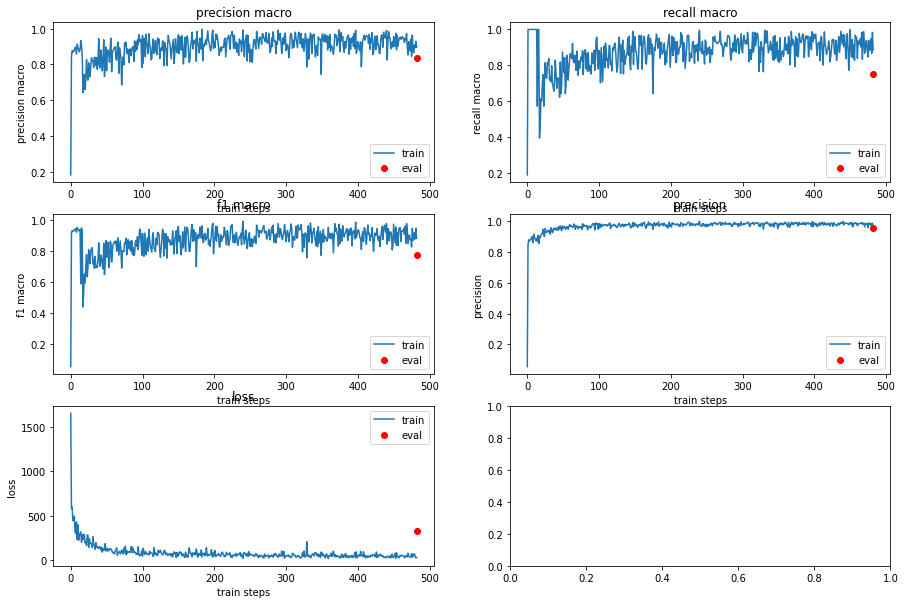

{'precision macro': 0.8374442854192856, 'recall macro': 0.7533772710939919, 'f1 macro': 0.7784279047154444, 'precision': 0.9547768949008285, 'loss': 320.6115261958196}
starting epoch 1


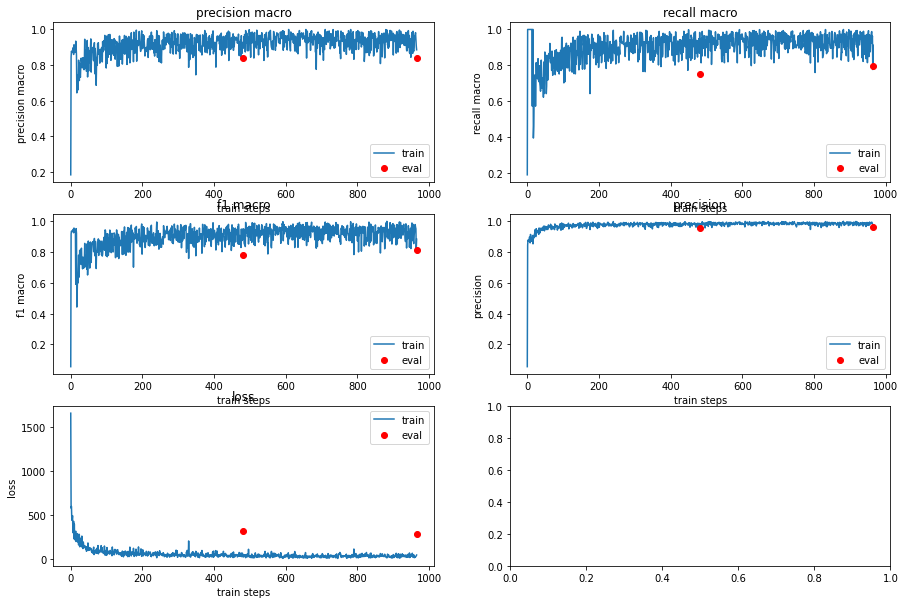

{'precision macro': 0.8416110126694819, 'recall macro': 0.7980880285113859, 'f1 macro': 0.8122855797340135, 'precision': 0.960525980518107, 'loss': 279.7943980877216}



starting epoch 0


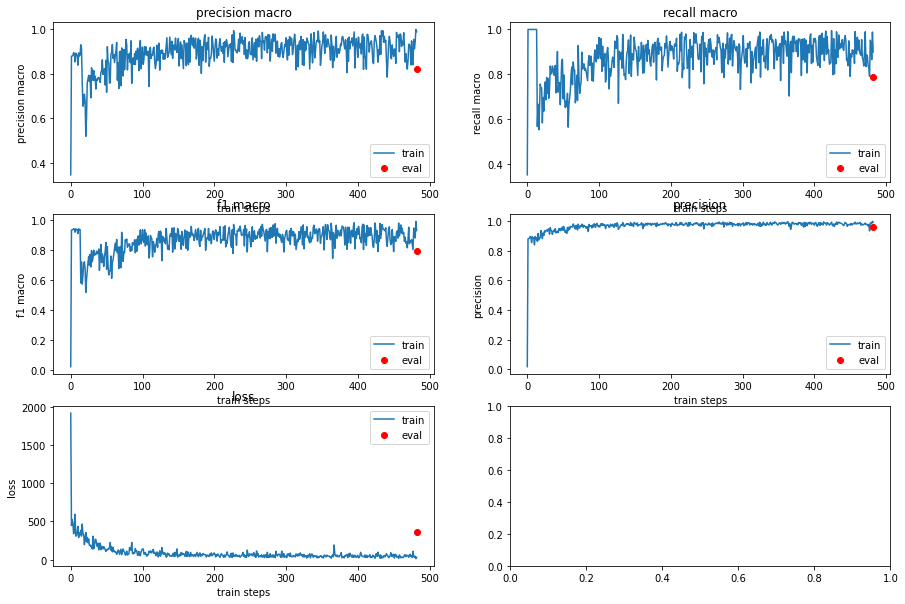

{'precision macro': 0.822470895290214, 'recall macro': 0.7865986574355877, 'f1 macro': 0.7929391507353384, 'precision': 0.9562522553732667, 'loss': 358.292632323045}
starting epoch 1


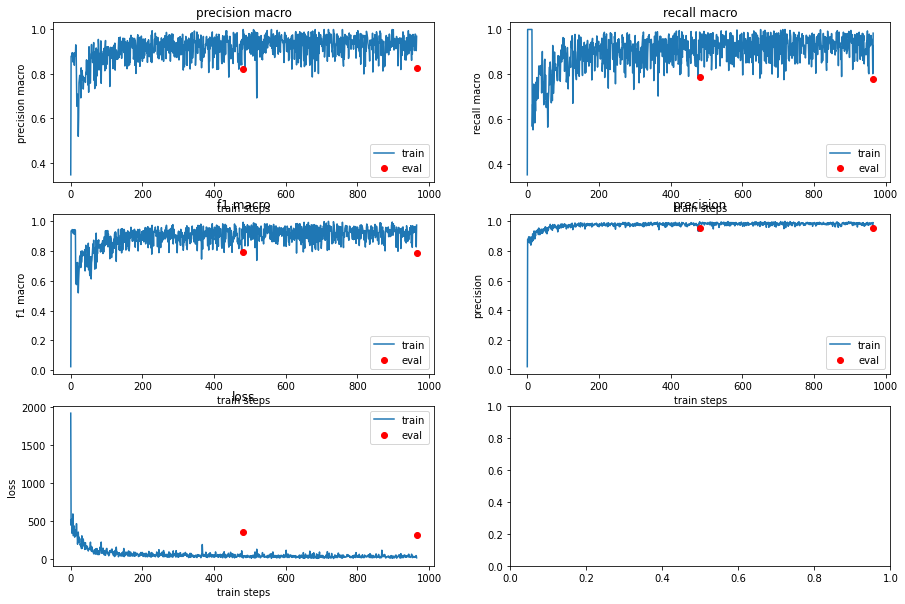

{'precision macro': 0.8279795643332059, 'recall macro': 0.7790648974827611, 'f1 macro': 0.7841506780056696, 'precision': 0.9554183306535398, 'loss': 311.67374244103064}



starting epoch 0


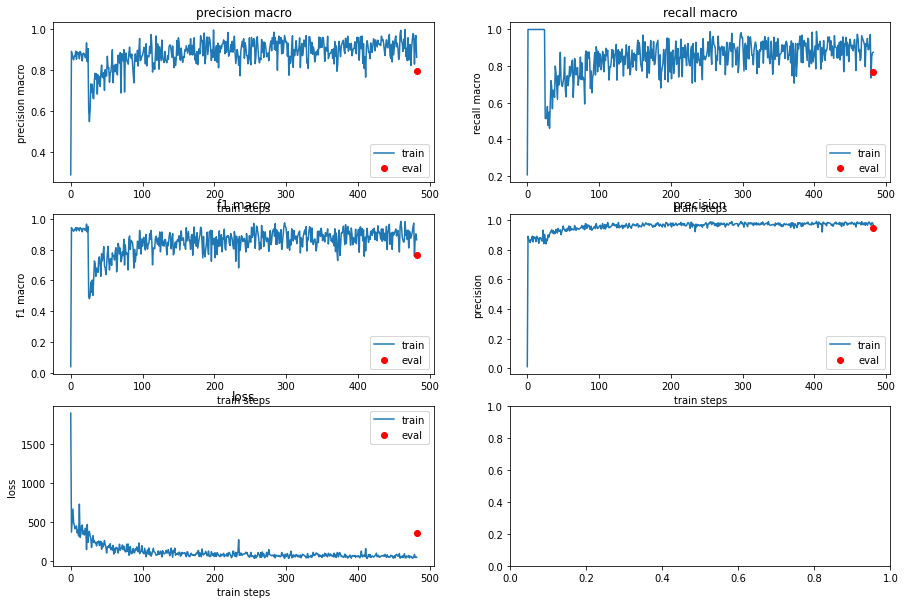

{'precision macro': 0.7951159680454717, 'recall macro': 0.7702339648793767, 'f1 macro': 0.7652971006146101, 'precision': 0.9504126740770591, 'loss': 353.5611921457144}
starting epoch 1


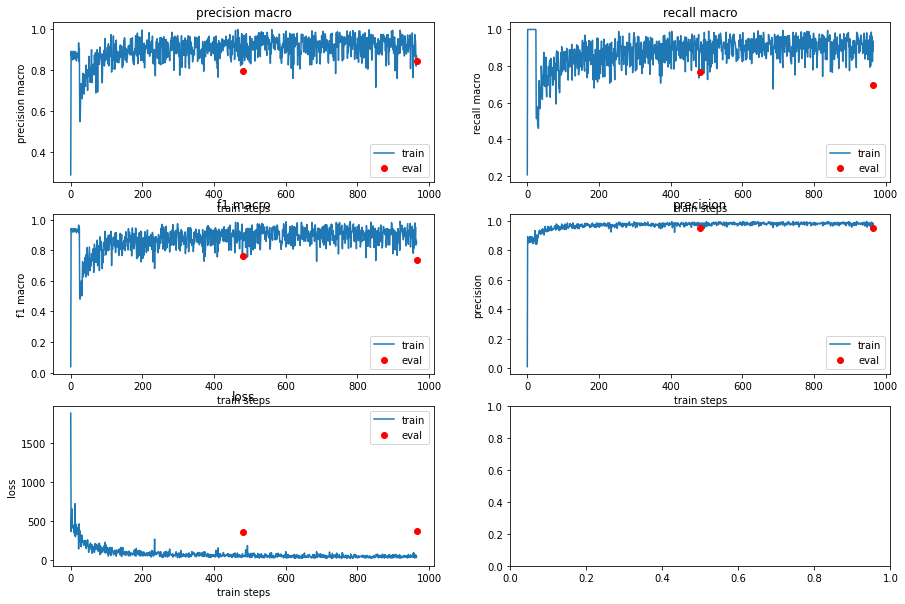

{'precision macro': 0.8451695298831221, 'recall macro': 0.6950075239278586, 'f1 macro': 0.7373113614875233, 'precision': 0.9476064842979837, 'loss': 365.95369837834284}


In [0]:
char_model_dict = models[0]
results = defaultdict(dict)
results_all = defaultdict(dict)
for char_model_dict in models:
    char_model = CharLM(lm_char2idx, 512, 512, gpu=True, **char_model_dict['params'])
    char_model.load_state_dict(torch.load(char_model_dict['path']))
    model = CHARLM_BERT_BiLSTM_CRF(len(idx2tag), idx2tag, 128,
                    char_model, 512 * 2,
                    m, 768).cuda()
    freeze_char_embedder(model)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
    results[char_model_dict['name']] = train_model(model, optimizer, data, test_data, 32, 2, tag2idx, idx2tag)
    for lang in test_data.keys():
        history = defaultdict(list)
        eval_epoch(model, batch_iterate({lang: test_data[lang]}, 128, tag_map=tag2idx), history, idx2tag)
        results_all[char_model_dict['name']][lang] = history['test']

In [0]:
model = CHARLM_BiLSTM_CRF(len(idx2tag), idx2tag, 128,
                       char_model, 512 * 2,
                       char_mappings['char2idx']).cuda()
freeze_char_embedder(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [0]:
train_model(model, optimizer, data, test_data, 32, 2, tag2idx, idx2tag)

In [0]:
for key in results.keys():
    print(key)
    for lang, history in results[key].items():
        print("f1 macro for %s: %f" % (lang, max(history['test'][-1]['f1 macro'], history['test'][-2]['f1 macro'])))

Concat lang
f1 macro for bg: 0.698633
f1 macro for cs: 0.643751
f1 macro for pl: 0.782272
f1 macro for ru: 0.599251
No lang
f1 macro for bg: 0.633083
f1 macro for cs: 0.647828
f1 macro for pl: 0.815283
f1 macro for ru: 0.555457
Add lang
f1 macro for bg: 0.643018
f1 macro for cs: 0.671728
f1 macro for pl: 0.681318
f1 macro for ru: 0.632567


In [0]:
for key, res in results_all.items():
    print(key)
    for lang, hist in res.items():
        print(lang, hist[0]['f1 macro'])

Concat lang
bg 0.768758405555689
cs 0.8407409273674075
pl 0.850322701254327
ru 0.7611159002786332
No lang
bg 0.7800656406162587
cs 0.8276207793599175
pl 0.8260901805060631
ru 0.686233696511291
Add lang
bg 0.6629059227457558
cs 0.8078030292881874
pl 0.8159266750356478
ru 0.6184556968228184


In [0]:
results_all['Concat lang']['bg']

[{'f1 macro': 0.768758405555689,
  'loss': 370.3663193552118,
  'precision': 0.950740116710498,
  'precision macro': 0.8110098095233701,
  'recall macro': 0.7489443142804474}]

### tSNE

In [0]:
char_model_dict = models[0]
char_model = CharLM(lm_char2idx, 512, 512, gpu=True, **char_model_dict['params']).cuda()
char_model.load_state_dict(torch.load(char_model_dict['path']))

<All keys matched successfully>

In [0]:
res_vectors = []
res_tags = []
embeddor = BertEmbeddor(m, 768)
for X, Y in batch_iterate(data, batch_size=32, shuffle=False):
    with torch.no_grad():
        sents, langs = zip(*X)
        X_emb, _ = char_model.embed_words(sents, langs)
        X_emb = X_emb.cpu().numpy()
    for i in range(len(Y)):
        embs = X_emb[i]
        lang = X[i][1]
        tags = Y[i]
        cur = None
        count = 0
        tag_class = None
        for word_idx, tag in enumerate(tags + ['O']):
            if tag.startswith('B'):
                if cur is not None:
                    res_vectors.append(cur / count)
                    res_tags.append((lang, tag_class))
                tag_class = tag[2:]
                cur = embs[word_idx]
                count = 1
            elif tag.startswith('I'):
                if cur is None:
                    print('WTF')
                    tag_class = tag[2:]
                    cur = embs[word_idx]
                    count = 1
                else:
                    cur += embs[word_idx]
                    count += 1
            else:
                if cur is not None:
                    res_vectors.append(cur / count)
                    res_tags.append((lang, tag_class))
                cur = None
                count = 0


WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF


In [0]:
from sklearn.manifold import TSNE
small = TSNE(n_components=2).fit_transform(res_vectors)

In [0]:
lang2idx = {l: i for i, l in enumerate(set(map(lambda x: x[0], res_tags)))}
class2idx = {l: i for i, l in enumerate(set(map(lambda x: x[1], res_tags)))}

In [0]:
vector_dict = defaultdict(list)
color_dict = defaultdict(list)
for v, (l, c) in zip(small, res_tags):
    vector_dict[c].append(v)
    color_dict[c].append(l)

In [0]:
plot.legend_elements()

([<matplotlib.lines.Line2D at 0x7f47eb31b7b8>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{1}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{3}$'])

In [0]:
plot.legend_elements()

([<matplotlib.lines.Line2D at 0x7f47eb0fce80>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{1}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{3}$'])

In [0]:
lang2idx

{'bg': 1, 'cs': 2, 'pl': 3, 'ru': 0}

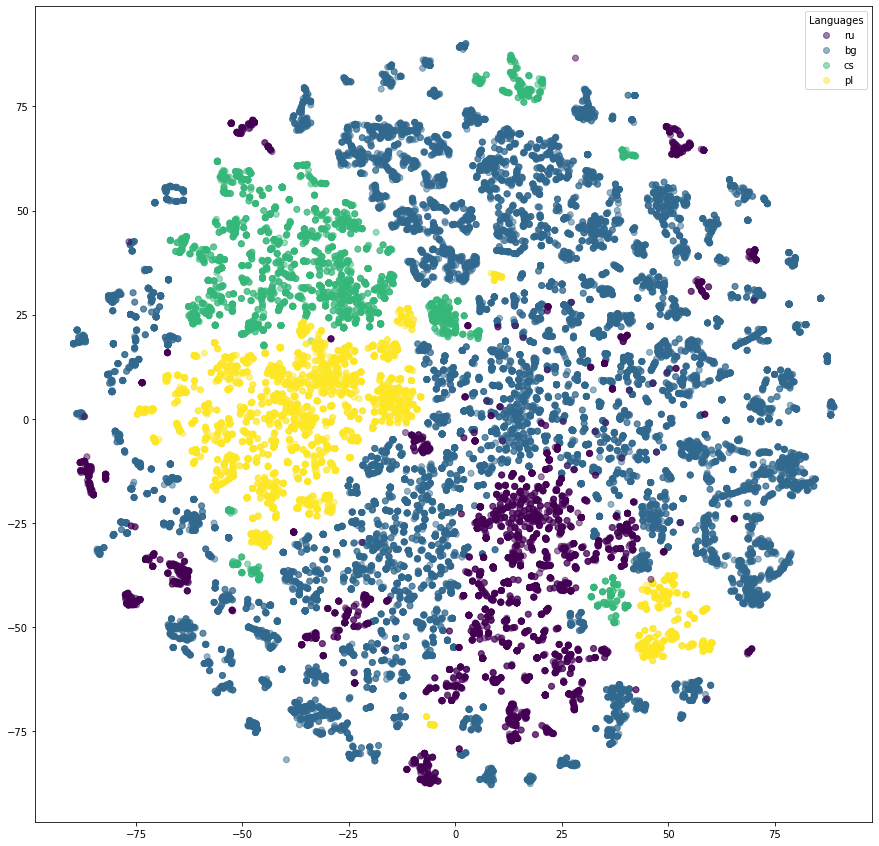

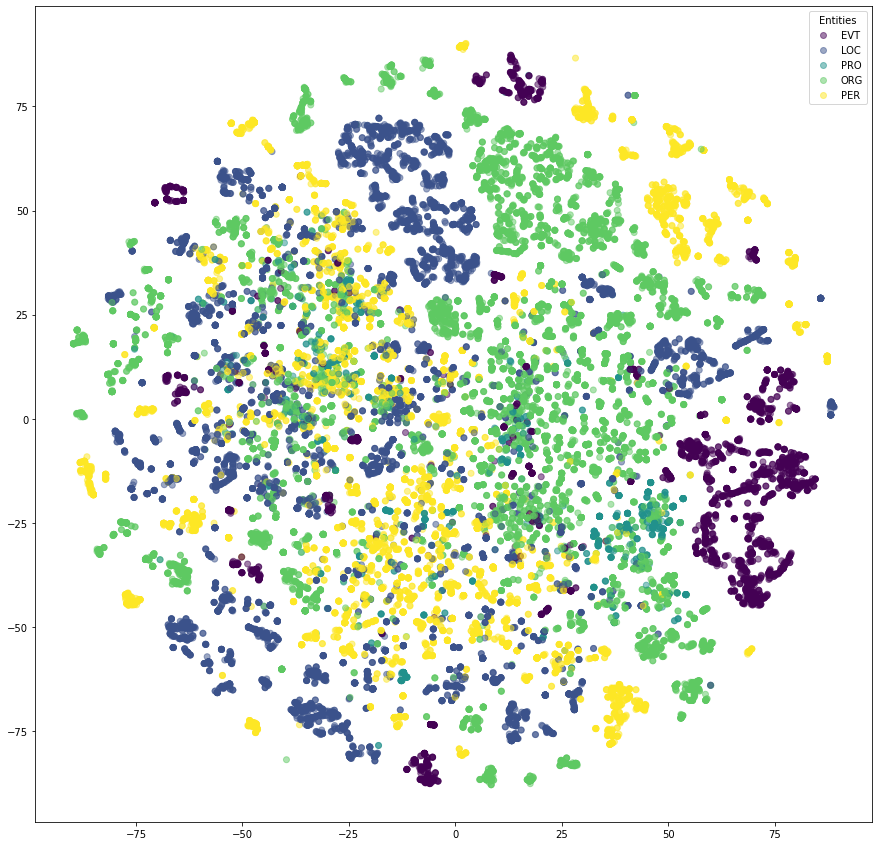

In [0]:
plt.figure(num=None, figsize=(15, 15))
plot = plt.scatter(small[:, 0], small[:, 1],
            c=list(map(lambda x: lang2idx.get(x[0]), res_tags)),
            alpha=0.5
)
plt.legend(
    plot.legend_elements()[0],
    sorted(lang2idx.keys(), key=lang2idx.get),
    title="Languages"
)
plt.show()

plt.figure(num=None, figsize=(15, 15))
plot = plt.scatter(small[:, 0], small[:, 1],
            c=list(map(lambda x: class2idx.get(x[1]), res_tags)),
            alpha=0.5
)
plt.legend(plot.legend_elements()[0],
        sorted(class2idx.keys(), key=class2idx.get),
        title="Entities")
plt.show()

# JUNK

In [0]:
from scipy.spatial.distance import cosine, euclidean

In [0]:
char_model_dict = models[2]
char_model = CharLM(lm_char2idx, 512, 512, gpu=True, **char_model_dict['params'])
char_model.load_state_dict(torch.load(char_model_dict['path']))
param_dict = {}
for l, p in char_model.language_embs.items():
    param_dict[l] = p.data.cpu().numpy()
param_list = list(param_dict.items())
for i, (l, e) in enumerate(param_list):
    for l1, e1 in param_list[i:]:
        if l != l1:
            print('cosine sim %.2f and euclidian distance %.2f between %s and %s' % (1 - cosine(e, e1), euclidean(e, e1), l, l1))


cosine sim 0.02 and euclidian distance 28.96 between bg and cs
cosine sim 0.05 and euclidian distance 28.61 between bg and pl
cosine sim 0.06 and euclidian distance 28.94 between bg and ru
cosine sim -0.05 and euclidian distance 28.87 between cs and pl
cosine sim -0.01 and euclidian distance 28.75 between cs and ru
cosine sim -0.07 and euclidian distance 29.68 between pl and ru


In [0]:
char_model_dict = models[0]
char_model = CharLM(lm_char2idx, 512, 512, gpu=True, **char_model_dict['params'])
char_model.load_state_dict(torch.load(char_model_dict['path']))
param_dict = {}
for l, p in char_model.language_embs.items():
    param_dict[l] = p.data.cpu().numpy()
param_list = list(param_dict.items())
for i, (l, e) in enumerate(param_list):
    for l1, e1 in param_list[i:]:
        if l != l1:
            print('cosine sim %.2f and euclidian distance %.2f between %s and %s' % (1 - cosine(e, e1), euclidean(e, e1), l, l1))

cosine sim -0.06 and euclidian distance 15.34 between bg and cs
cosine sim 0.07 and euclidian distance 14.19 between bg and pl
cosine sim -0.07 and euclidian distance 13.77 between bg and ru
cosine sim -0.02 and euclidian distance 15.83 between cs and pl
cosine sim -0.00 and euclidian distance 14.31 between cs and ru
cosine sim 0.07 and euclidian distance 13.60 between pl and ru


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
mat = np.zeros((4, param_dict['ru'].shape[0]))
for i, lang in enumerate(sorted(param_dict.keys())):
    mat[i] = param_dict[lang]


AttributeError: ignored

In [0]:
simm_mat = cosine_similarity(mat)
names = sorted(param_dict.keys())

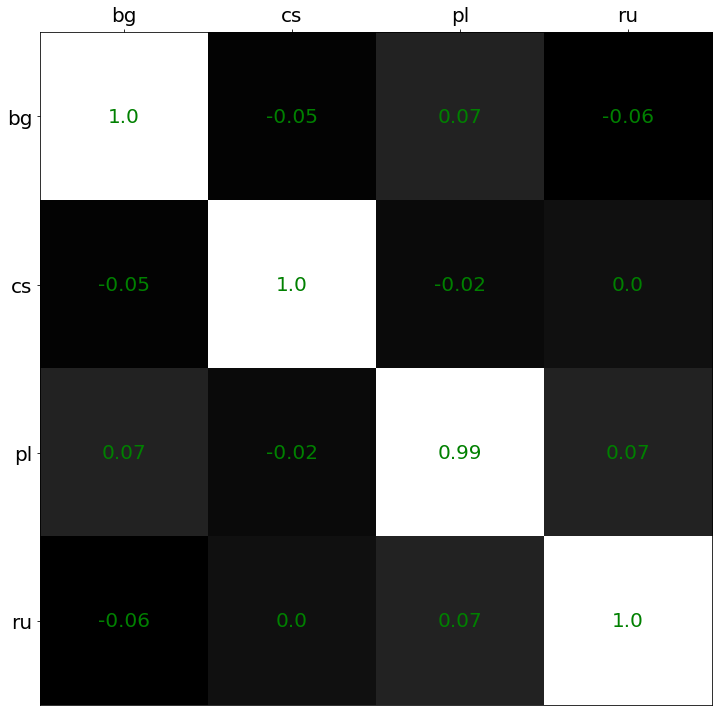

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(simm_mat, cmap='gray')

# We want to show all ticks...
ax.set_xticks(np.arange(len(names)))
ax.xaxis.tick_top()
ax.set_yticks(np.arange(len(names)))
# ... and label them with the respective list entries
ax.set_xticklabels(names)
ax.set_yticklabels(names)
ax.tick_params(axis='both', which='major', labelsize=20)
for i in range(len(names)):
    for j in range(len(names)):
        text = ax.text(j, i, int(simm_mat[i, j] * 100) / 100,
                       ha="center", va="center", color="g", fontsize=20)
fig.tight_layout()
plt.show()


In [0]:
param_dict.keys()

dict_keys(['bg', 'cs', 'pl', 'ru'])

In [0]:
with open("./gdrive/My Drive/CHARM_LMS/char2idx", 'wb') as f:
    pickle.dump(lm_char2idx, f)

подсчет
- средняя длина предложений
- количество сущностей 
- сколько предложений в каждом языке 

In [0]:
from collections import defaultdict
sentence_cnt = defaultdict(int)
sentence_len = defaultdict(int)
entities_sum = defaultdict(int)
for x, y in batch_iterate(data, shuffle=False):
    for sent, lang in x:
        sentence_cnt[lang] += 1
        sentence_len[lang] += len(sent)
    for i, entities in enumerate(y):
        lang = x[i][1]
        entities_sum[lang] += len(list(filter(lambda x: x.startswith('B'), entities)))

for lang in sentence_len:
    sentence_len[lang] /= sentence_cnt[lang]

In [0]:
entities_sum

defaultdict(int, {'bg': 19910, 'cs': 3819, 'pl': 4572, 'ru': 4740})

In [0]:
sentence_len

defaultdict(int,
            {'bg': 27.127100840336134,
             'cs': 19.171666666666667,
             'pl': 18.151524777636595,
             'ru': 19.94644424934153})

In [0]:
sentence_cnt

defaultdict(int, {'bg': 7616, 'cs': 2400, 'pl': 3148, 'ru': 2278})

In [0]:
sum(sentence_len.values()) / sum(sentence_cnt.values())

23.001618961274445

In [0]:
sentence_len

defaultdict(int,
            {'bg': 27.127100840336134,
             'cs': 19.171666666666667,
             'pl': 18.151524777636595,
             'ru': 19.94644424934153})

In [0]:
len(lm_char2idx)

NameError: ignored